<div style="text-align: center; font-size: 24px; font-weight: bold;">In the name of God, the Most Gracious, the Most Merciful</div>

Full Name: MohammadDavood VahhabRajaee

Student ID: 4041419041

# Building Neural Network Using Torch

This assignment is structured to mirror a standard machine learning workflow, broken down into distinct, logical stages:

1. Data Loading and Inspection: We begin by loading the dataset and performing an initial exploration to understand its structure, features, and potential data quality issues.

2. Data Preprocessing: Raw data is seldom suitable for model training. This stage involves critical steps such as data cleaning (e.g., correcting data types), splitting the data into training, validation, and test sets, and standardizing the features to ensure stable and efficient model convergence.

3. Model Design: We define the architecture of our neural network using PyTorch's nn.Module.

4. Training Loop Design: The heart of the learning process is implemented here. This involves defining a loss function (Mean Squared Error for regression), selecting an optimizer (e.g. Adam), and constructing a robust training loop that iterates over the data, performs forward and backward propagation, and tracks performance on a validation set to monitor for overfitting.

5. Evaluation and Visualization: After training, the model's predictive power is quantitatively assessed on a held-out test set using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the R-squared (R²) score. Furthermore, the results are visualized through training/validation loss curves and a scatter plot of predicted vs. actual prices, providing an intuitive understanding of the model's accuracy.

By completing this assignment, we aim to solidify our understanding of the end-to-end process of developing a neural network, from data preparation to deployment and evaluation, using the powerful and flexible PyTorch framework. The following sections document this process in detail, including code implementation, results, and analysis.

## 1.Load and Inspect the Data

### Practice 1

Task 1: Load the Dataset

- Question: Load the BostonHousing.csv file into a variable named df.

  **Hint**: You will need to use a function from the pandas library to read a CSV file. Don't forget to import the library first.

Task 2: Initial Inspection

- Question 2.1: Print the shape of the DataFrame to find out how many samples and features it contains.

  **Hint**: DataFrames have a .shape attribute.

- Question 2.2: Print a list of the column names.

  **Hint**: DataFrames have a .columns attribute. You can convert it to a list for a cleaner printout.

- Question 2.3: Display the first 5 rows of the DataFrame to get a feel for the actual data.

  **Hint**: There is a simple DataFrame method to show the first n rows.

Task 3: Data Cleaning

- Question 3.1: The 'chas' column should be a binary integer (0 or 1), but it was likely read as a string. Convert this column to an integer data type.

  **Hint**: You can assign a new data type to a column using .astype().

- Question 3.2: Check if the dataset has any missing (NaN) values. Print the number of missing values for each column.

  **Hint**: Combine the .isnull() and .sum() methods on the DataFrame.

- Question 3.3: Check if there are any infinite values in the dataset. The final output should be a single boolean (True or False).

  **Hint**: You can compare the entire DataFrame (df) with float('inf') and then use .any().any() to collapse the result into a single value.

In [1]:
import pandas as pd
import numpy as np

# Task 1: Load the Dataset
df = pd.read_csv('BostonHousing.csv')

# Task 2.1: Print the shape of the DataFrame
print(f"Shape: {df.shape}\n")

# Task 2.2: Print a list of the column names
# Standardize to lowercase as a good practice
df.columns = df.columns.str.lower().str.strip()
print(" Columns:")
print(list(df.columns))

# Task 2.3: Display the first 5 rows
print("\n Sample rows:")
display(df.head())

Shape: (506, 14)

 Columns:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

 Sample rows:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Let’s clean "chas" (it's a string "0"/"1" due to CSV quoting):

In [2]:
# Task 3.1: Convert 'chas' column to integer
if df['chas'].dtype == 'object':
    df['chas'] = df['chas'].astype(int)

# Task 3.2: Check for missing (NaN) values
print("\nMissing values per column:")
print(df.isnull().sum())

# Task 3.3: Check for infinite values
has_inf = np.isinf(df.values).any()
print("\nAny infinite values?")
print(has_inf)


Missing values per column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Any infinite values?
False


## 2.Data Preprocessing

### practice 2
Now, you will prepare the loaded data for training a neural network. This involves separating features from the target, splitting the data into sets for training, validation, and testing, and normalizing the features.

Objective: Your goal is to transform the raw DataFrame into PyTorch tensors that are properly scaled and split for model training and evaluation.
Tasks:

Task 1: Separate Features and Target

- Question 1.1: Create a variable X containing all the features (all columns except the target 'medv'). Convert the values to np.float32.

  **Hint**: Use df.drop() to remove the target column. The .values attribute gives you a NumPy array.

- Question 1.2: Create a variable y containing only the target column ('medv'). Convert the values to np.float32.

  **Hint**: You can select the column directly and use .values.

Task 2: Split the Data
We will create three sets:

- Training set: Used to train the model.

- Validation set: Used to evaluate the model during training and tune hyperparameters.

- Test set: Used for the final evaluation of the model.

- Question 2.1: First, split the data temporarily into X_temp, X_test, y_temp, y_test, using a 15% test size.

  **Hint**: Use train_test_split from sklearn. Set test_size=0.15 and use a random_state=42 for reproducible results.

- Question 2.2: Now, split the temporary data (X_temp, y_temp) into the final training and validation sets. The validation set should be 15% of the original data. Calculate the test_size for this second split accordingly (≈0.1765).

  **Hint**: 0.1765 is approximately 15/85. Use random_state=42 again.

Task 3: Normalize the Features
Neural networks perform much better with normalized data. We will standardize the features (subtract mean, divide by standard deviation).

- Question 3.1: Calculate the mean (train_mean) and standard deviation (train_std) using only the training data (X_train).

  **Hint**: Use .mean(axis=0) and .std(axis=0) on X_train.

- Question 3.2: To avoid division by zero, replace any standard deviation value of 0 with 1.0.

  **Hint**: Use np.where(train_std == 0, 1.0, train_std).

- Question 3.3: Use the training mean and standard deviation to normalize X_train, X_val, and X_test.

  **Hint**: Apply the formula: (data - train_mean) / train_std.

Task 4: Convert to PyTorch Tensors

- Question 4.1: Convert the normalized training, validation, and test features (X_train_norm, X_val_norm, X_test_norm) into PyTorch tensors.

  **Hint**: Use torch.tensor().

- Question 4.2: Convert the target variables (y_train, y_val, y_test) into PyTorch tensors. Ensure their shape is [N, 1] for regression (where N is the number of samples), not [N].

  **Hint**: Use .unsqueeze(1) on the tensor to add an extra dimension.

### Load Libraries

In [ ]:
import torch
from sklearn.model_selection import train_test_split
import numpy as np

### Task 1: Separate Features and Target
### X should contain all columns except 'medv'

In [ ]:
X = df.drop('medv', axis=1).values.astype(np.float32)

### y should contain only the 'medv' column

In [ ]:
y = df['medv'].values.astype(np.float32)

### Task 2: Split the Data (70% Train, 15% Validation, 15% Test)
### First, split into a temporary set (85%) and the final test set (15%)

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

### Now, split the temporary set into the final training and validation sets.
### The validation size should be 15% of the original, so test_size = 15/85 ≈ 0.1765

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42
)

print(f"Splits: train={len(X_train)}, val={len(X_val)}, test={len(X_test)}\n")

Splits: train=354, val=76, test=76



Normalize features (standardization: (x - μ)/σ)

### Task 3: Normalize the Features
### Calculate mean and std ONLY from the training data

In [ ]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

### Replace std=0 with 1.0 to avoid division by zero

In [ ]:
train_std = np.where(train_std == 0, 1.0, train_std)

### Apply the normalization to all sets using the training statistics

In [ ]:
X_train_norm = (X_train - train_mean) / train_std
X_val_norm = (X_val - train_mean) / train_std
X_test_norm = (X_test - train_mean) / train_std

### Task 4: Convert to PyTorch Tensors
### Convert features

In [ ]:
X_train_t = torch.tensor(X_train_norm)
X_val_t = torch.tensor(X_val_norm)
X_test_t = torch.tensor(X_test_norm)

### Convert targets and add a new dimension to make their shape [N, 1]

In [ ]:
y_train_t = torch.tensor(y_train).unsqueeze(1)
y_val_t = torch.tensor(y_val).unsqueeze(1)
y_test_t = torch.tensor(y_test).unsqueeze(1)

print("Shapes after normalization & unsqueeze:")
print(f"X_train: {X_train_t.shape}, y_train: {y_train_t.shape}")

Shapes after normalization & unsqueeze:
X_train: torch.Size([354, 13]), y_train: torch.Size([354, 1])


Create Custom Dataset Class

### practice 3
In this section, you will create a custom Dataset class and DataLoader objects. This is a crucial step for efficiently feeding data in batches to your neural network during training.

Objective: Your goal is to wrap the preprocessed tensors into a PyTorch Dataset and then create DataLoader objects that will handle batching and shuffling.
Tasks:

Task 1: Create a Custom Dataset Class
A Dataset class is required to tell PyTorch how to access your data.

- Question 1.1: Create a class called BostonDataset that inherits from torch.utils.data.Dataset.

- Question 1.2: Define the __init__ method. It should take X (features) and y (targets) as input and store them as instance attributes (e.g., self.X and self.y).

- Question 1.3: Define the __len__ method. It should return the total number of samples in the dataset.

  **Hint**: The length is simply the number of rows in self.X (or self.y).

- Question 1.4: Define the __getitem__ method. It takes an index idx and should return a tuple containing the features and the target for that single sample: (self.X[idx], self.y[idx]).

Task 2: Instantiate Dataset Objects

- Question 2.1: Create three dataset objects: train_dataset, val_dataset, and test_dataset using the BostonDataset class you just defined.

  **Hint**: Use the tensors you created in the previous section (X_train_t, y_train_t, etc.).

Task 3: Create DataLoader Objects
DataLoaders wrap the Dataset and provide features like batching and shuffling.

- Question 3.1: Create a DataLoader for the training dataset. Set the batch_size to 32 and shuffle=True. Why is shuffling important for the training set?

- Question 3.2: Create DataLoader objects for the validation and test datasets. Set batch_size to 32, but should you shuffle these sets? Why or why not?

  **Hint**: Think about the purpose of validation and testing – do we need the order of data to be random during evaluation?

In [ ]:
from torch.utils.data import Dataset, DataLoader

### Task 1: Create a Custom Dataset Class

In [ ]:
class BostonDataset(Dataset):
    def __init__(self, X, y):
        # Store the features (X) and targets (y)
        self.X = X
        self.y = y

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.X)

    def __getitem__(self, idx):
        # Return one sample (a tuple of features and target) at the given index
        return self.X[idx], self.y[idx]

### Task 2: Instantiate Dataset Objects

In [ ]:
train_dataset = BostonDataset(X_train_t, y_train_t)
val_dataset = BostonDataset(X_val_t, y_val_t)
test_dataset = BostonDataset(X_test_t, y_test_t)

### Create DataLoaders

### Task 3: Create DataLoader Objects

In [ ]:
batch_size = 32

### The training loader shuffles the data to ensure randomness in each epoch

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

### Validation and test loaders do not need to be shuffled

In [ ]:
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(f"Batches per epoch: train={len(train_loader)}, val={len(val_loader)}")

Batches per epoch: train=12, val=3


### practice 4
1. Why do we use a batch_size instead of processing the entire dataset at once?

2. Why is it important to shuffle the training data but not the validation/test data?

3. What would happen if you used a very small batch_size (like 1)? What about a very large one (like the entire dataset)?


---

**1. Why do we use a `batch_size` instead of processing the entire dataset at once?**

We use batches for three main reasons:
*   **Memory Efficiency:** The entire dataset, especially in deep learning, can be too large to fit into RAM or, more importantly, the GPU's VRAM. Processing the data in smaller chunks (batches) makes training feasible.
*   **Faster Convergence:** Updating the model's weights after every batch (instead of once per epoch) leads to more frequent updates. This allows the model to start learning much faster and can help it navigate the loss landscape more effectively.
*   **Better Generalization:** The noise introduced by the gradient estimation from smaller, random batches can act as a form of regularization. This helps the model avoid getting stuck in sharp local minima and often leads to a model that generalizes better to unseen data.

**2. Why is it important to shuffle the training data but not the validation/test data?**

*   **Training Data:** Shuffling is crucial for the training set to ensure that each batch is a random and representative sample of the full dataset. If the data is not shuffled, the model might learn patterns based on the order of the data, especially if it's sorted in some way. This prevents the model from being biased by sequential correlations and improves learning.
*   **Validation/Test Data:** These datasets are used for evaluation, not for learning. The goal is to get a consistent and unbiased measure of the model's performance. Shuffling them is unnecessary because the overall metrics (like average loss or accuracy) will be the same regardless of the order. Not shuffling also ensures that the evaluation results are reproducible every time you run it.

**3. What would happen if you used a very small `batch_size` (like 1)? What about a very large one (like the entire dataset)?**

*   **Very Small `batch_size` (e.g., 1):** This is called **"Stochastic Gradient Descent" (SGD)**.
    *   **Pros:** The high variance in gradient updates can help the model escape sharp local minima. It requires very little memory.
    *   **Cons:** The training process is very noisy and unstable. Convergence can be extremely slow because the parameter updates fluctuate wildly with each sample. It also fails to take advantage of GPU parallelization, making it computationally inefficient.

*   **Very Large `batch_size` (e.g., the entire dataset):** This is called **"Batch Gradient Descent"**.
    *   **Pros:** It provides a very accurate estimate of the gradient, leading to a stable and smooth convergence path. It makes excellent use of GPU hardware.
    *   **Cons:** It requires a massive amount of memory. It is much more likely to converge to a sharp local minimum, which can lead to poorer generalization. Most importantly, it is very slow, as you only get one weight update per epoch.

---

## 3.Model Design

### practice 5
In this section, you will design the neural network architecture that will learn to predict house prices.

Objective: Your goal is to create neural network models using PyTorch's `nn.Module`, starting with a simple linear model.
Tasks:

Task 1: Implement a Linear Regressor (Single Layer)
This is the simplest model, with no hidden layers - just input to output.

- Question 1.1: Create a class LinearRegressor that inherits from nn.Module.

- Question 1.2: In the __init__ method, initialize the superclass and create a single linear layer (nn.Linear). The layer should have input_dim input features and output_dim output features. Use default parameters for the rest.

 **Hint**: The Boston dataset has 13 features, and we're predicting 1 value (price).

- Question 1.3: Define the forward method. It should take input x and pass it through the linear layer, then return the result.

Task 2: Instantiate and Examine a Model

- Question 2.1: Check if a GPU is available and set the device accordingly.

- Question 2.2: Create an instance of the LinearRegressor model with appropriate dimensions and move it to the available device.

- Question 2.3: Print the model architecture to examine its structure.

In [ ]:
import torch.nn as nn

### Task 1: Implement a Linear Regressor (Single Layer)

In [ ]:
class LinearRegressor(nn.Module):
    def __init__(self, input_dim=13, output_dim=1):
        # Initialize the parent nn.Module
        super(LinearRegressor, self).__init__()
        # Define the single fully connected linear layer
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # Define the forward pass: data flows through the linear layer
        x = self.linear(x)
        return x


### Instantiate model

### Task 2: Instantiate and Examine a Model
### Set the device to GPU if available, otherwise CPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}\n")

### Create an instance of the model with the correct input dimension

In [ ]:
model = LinearRegressor(input_dim=X_train_t.shape[1], output_dim=1).to(device)

### Print the model's architecture

In [ ]:
print("Model architecture:")
print(model)

Using device: cpu
Model architecture:
LinearRegressor(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)


### practice 6
1. What is the purpose of the forward method in a PyTorch model?

2. Why do we need to call super().__init__() in the __init__ method?



---

**1. What is the purpose of the `forward` method in a PyTorch model?**

The `forward` method defines the core computation of the neural network. It dictates how the input data flows through the layers of the model to produce an output. Specifically:
*   It takes the input tensor (`x`) as an argument.
*   It passes this input through the layers (like `nn.Linear`) and activation functions that were defined in the `__init__` method.
*   It returns the final output tensor (the model's prediction).

When you call an instance of your model like `model(input_data)`, you are implicitly executing the code inside its `forward` method.

**2. Why do we need to call `super().__init__()` in the `__init__` method?**

When we create a custom model class, it inherits from PyTorch's `nn.Module`. The `nn.Module` class has its own constructor (`__init__` method) that performs crucial setup tasks. Calling `super().__init__()` executes this parent constructor.

This is necessary because the `nn.Module`'s `__init__` method:
*   Initializes the internal machinery needed to track the model's layers (in an internal dictionary called `_modules`).
*   Sets up mechanisms to register parameters (`_parameters`) and buffers.
*   Enables functionalities like `model.parameters()` (which collects all trainable weights) and `model.to(device)` (which moves the model to a CPU or GPU).

If you forget to call `super().__init__()`, your model will not be properly registered as a PyTorch module, and you will get an error when you try to define layers or use any of its essential features.

## 4.Loss, Optimizer & Training Loop Design

### practice 7
In this section, you will set up the components needed to train your neural network: the loss function, optimizer, and training loop. You will also implement functions for both training and evaluation.

Objective: Your goal is to define how the model learns from its mistakes (loss function), how it updates its parameters (optimizer), and the process for iterating through the data (training loop).
Tasks:

Task 1: Define Loss Function and Optimizer

- Question 1.1: Choose an appropriate loss function for this regression problem. Since we're predicting continuous values (house prices), which loss function is most commonly used?

  **Hint**: Look for nn.MSELoss for Mean Squared Error.

- Question 1.2: Choose an optimizer to update the model parameters. Adam is a good default choice that adapts the learning rate for each parameter.

  **Hint**: Use torch.optim.Adam and pass the model's parameters. Set the learning rate (lr) to 0.001.

Task 2: Implement the Training Function
This function will handle one epoch of training.

- Question 2.1: Define a function train_epoch that takes the model, dataloader, criterion, optimizer, and device as parameters.

- Question 2.2: Set the model to training mode using model.train().

- Question 2.3: Initialize a variable to track the total loss for the epoch.

- Question 2.4: Iterate through batches from the dataloader. For each batch:

        Move the data to the appropriate device

        Perform a forward pass to get predictions

        Calculate the loss between predictions and true values

        Reset the optimizer's gradients

        Perform backward propagation to compute gradients

        Update the model parameters using the optimizer

        Accumulate the loss (weighted by batch size)

- Question 2.5: Calculate and return the average loss for the epoch.

Task 3: Implement the Evaluation Function
This function will evaluate the model on validation/test data without updating parameters.

- Question 3.1: Define a function evaluate that takes the model, dataloader, criterion, and device as parameters.

- Question 3.2: Set the model to evaluation mode using model.eval().

- Question 3.3: Use torch.no_grad() context manager to disable gradient calculation (faster, less memory).

- Question 3.4: Iterate through batches, compute predictions and loss, but don't perform backward pass or parameter updates.

- Question 3.5: Calculate and return the average loss.


### Task1 : Define Loss Function and Optimizer

In [ ]:
criterion = nn.MSELoss()  # mean squared error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam: adaptive LR, good default

### Training Loop (with validation tracking)

### Task 2: Implement the Training Function

In [ ]:
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    for X_batch, y_batch in dataloader:
        # Move batch data to the selected device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()  # Reset gradients to zero
        loss.backward()        # Compute gradients (backpropagation)
        optimizer.step()       # Update model weights

        # Accumulate loss, weighted by the actual batch size
        total_loss += loss.item() * X_batch.size(0)

    # Return the average loss for the epoch
    avg_loss = total_loss / len(dataloader.dataset)
    return avg_loss

### Task 3: Implement the Evaluation Function

In [ ]:
def evaluate(model, dataloader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    with torch.no_grad():  # Disable gradient computation
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item() * X_batch.size(0)
    
    avg_loss = total_loss / len(dataloader.dataset)
    return avg_loss

### Full Training Procedure

### Training config

In [ ]:
n_epochs = 2000
train_losses = []
val_losses = []

print("Starting training...")

for epoch in range(1, n_epochs + 1):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 20 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d}/{n_epochs} | "
              f"Train Loss: {train_loss:.4f} | "
              f"Val Loss: {val_loss:.4f} | ")

Starting training...
Epoch   1/2000 | Train Loss: 604.7568 | Val Loss: 583.3914 | 
Epoch  20/2000 | Train Loss: 583.9900 | Val Loss: 569.0693 | 
Epoch  40/2000 | Train Loss: 565.5217 | Val Loss: 555.9708 | 
Epoch  60/2000 | Train Loss: 549.2063 | Val Loss: 544.0217 | 
Epoch  80/2000 | Train Loss: 534.7537 | Val Loss: 532.9152 | 
Epoch 100/2000 | Train Loss: 521.5976 | Val Loss: 522.0919 | 
Epoch 120/2000 | Train Loss: 508.6330 | Val Loss: 511.7678 | 
Epoch 140/2000 | Train Loss: 497.0024 | Val Loss: 501.6670 | 
Epoch 160/2000 | Train Loss: 485.1360 | Val Loss: 491.2138 | 
Epoch 180/2000 | Train Loss: 473.6772 | Val Loss: 481.0608 | 
Epoch 200/2000 | Train Loss: 462.7133 | Val Loss: 471.6101 | 
Epoch 220/2000 | Train Loss: 451.8488 | Val Loss: 461.7943 | 
Epoch 240/2000 | Train Loss: 440.9998 | Val Loss: 451.9726 | 
Epoch 260/2000 | Train Loss: 430.7483 | Val Loss: 442.5174 | 
Epoch 280/2000 | Train Loss: 420.6172 | Val Loss: 432.9733 | 
Epoch 300/2000 | Train Loss: 410.9067 | Val Loss:

### practice 8
1. Why do we call optimizer.zero_grad() before loss.backward()?

2. What's the difference between model.train() and model.eval() modes?

3. Why do we use torch.no_grad() during evaluation?

4. Why do we track both training and validation loss?

5. What might it indicate if training loss decreases but validation loss increases?

6. Why do we accumulate loss weighted by batch size instead of just averaging batch losses?

## 5.Evaluation on Test Set

### practice 9
In this final section, you will evaluate your trained model on the held-out test set to get an unbiased estimate of its performance on unseen data. You will also compute multiple metrics to thoroughly assess the model's predictive power.

Objective: Your goal is to generate predictions on the test set and calculate comprehensive evaluation metrics to understand how well your model generalizes to new, unseen data.
Tasks:

Task 1: Implement Prediction Function

- Question 1.1: Define a function predict that takes the model, dataloader, and device as parameters.

- Question 1.2: Set the model to evaluation mode and use torch.no_grad().

- Question 1.3: Iterate through the test dataloader, generate predictions for each batch, and collect both predictions and true targets.

- Question 1.4: Concatenate all batch predictions and targets into flat NumPy arrays for easier metric calculation.

  **Hint**: Use np.concatenate() and .flatten() to create 1D arrays.

Task 2: Generate Predictions and Calculate Metrics

- Question 2.1: Use your predict function to get predictions and true values for the test set.

- Question 2.2: Calculate the following metrics:

    - Mean Squared Error (MSE): Average of squared differences between predicted and actual values

    - Root Mean Squared Error (RMSE): Square root of MSE, in the same units as the target

    - Mean Absolute Error (MAE): Average of absolute differences

    - R-squared (R²): Proportion of variance in the target explained by the model

  **Hint**: Use sklearn.metrics for MAE and R². For MSE and RMSE, you can use NumPy operations.

Task 3: Interpret and Report Results

- Question 3.1: Print all calculated metrics in a clear, readable format.

- Question 3.2: Convert RMSE and MAE to dollar amounts for better interpretation (remember: prices are in $1000s).

- Question 3.3: Analyze what these metrics tell you about your model's performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

### Task 1: Implement Prediction Function

In [ ]:
def predict(model, dataloader, device):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(device)
            y_pred = model(X_batch)
            all_preds.append(y_pred.cpu().numpy())
            all_targets.append(y_batch.cpu().numpy())
    
    # Flatten the lists of arrays into single 1D arrays
    all_preds = np.concatenate(all_preds).flatten()
    all_targets = np.concatenate(all_targets).flatten()
    return all_preds, all_targets

### Task 2: Generate Predictions and Calculate Metrics

In [ ]:
y_pred_test, y_true_test = predict(model, test_loader, device)

### Calculate metrics

In [ ]:
mse_test = np.mean((y_pred_test - y_true_test)**2)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
r2_test = r2_score(y_true_test, y_pred_test)

### Task 3: Interpret and Report Results

In [ ]:
print("Test Set Evaluation:")
print(f"  MSE  : {mse_test:.4f}")
print(f"  RMSE : {rmse_test:.4f}  → ~${rmse_test * 1000:,.0f} error")
print(f"  MAE  : {mae_test:.4f}  → ~${mae_test * 1000:,.0f} avg error")
print(f"  R²   : {r2_test:.4f}")

Test Set Evaluation:
  MSE  : 16.1136
  RMSE : 4.0142  → ~$4,014 error
  MAE  : 2.8534  → ~$2,853 avg error
  R²   : 0.7533


## 6.Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

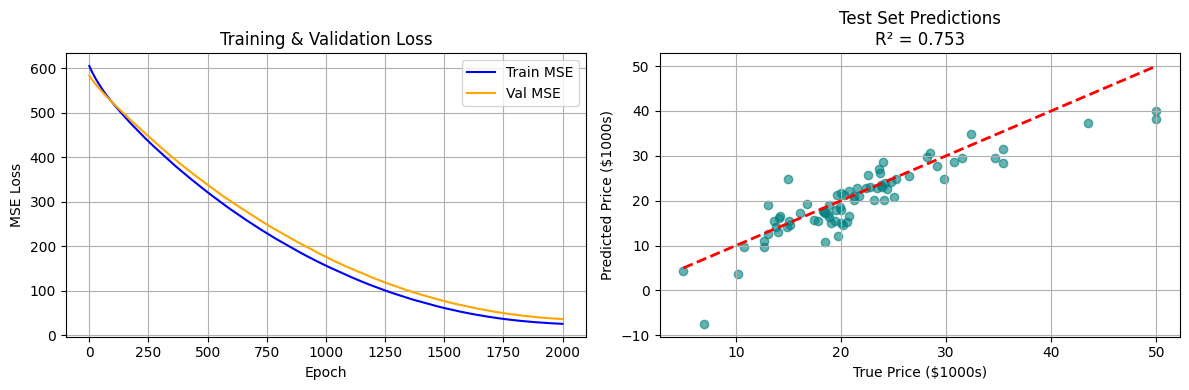

In [ ]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Training & Validation Loss Curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train MSE", color="blue")
plt.plot(val_losses, label="Val MSE", color="orange")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)

# Plot 2: Prediction vs. True Values on the Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_true_test, y_pred_test, alpha=0.6, color="teal")
# Add the y=x line for reference (perfect predictions)
plt.plot([y_true_test.min(), y_true_test.max()],
         [y_true_test.min(), y_true_test.max()], 'r--', lw=2, label='y=x (Perfect fit)')
plt.xlabel("True Price ($1000s)")
plt.ylabel("Predicted Price ($1000s)")
plt.title(f"Test Set Predictions\nR² = {r2_test:.4f}")
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()